# Preprocessing Dataset #2

## Import the data

In [83]:
import pandas as pd
# 1. Load the datasets into Pandas dataframes
names2=['A1-Time','A2','A3','A4','A5','A6','A7','A8','A9','LABEL']
#Full training set will be split into training and validation
dataset2_trn_full = pd.read_csv('shuttle_trn.csv', index_col=False, names=names2, sep=' ', engine='python') 
dataset2_test = pd.read_csv('shuttle_tst.csv', index_col=False, names=names2, sep=' ', engine='python')


## Data visulization & Cleaning
### Note: Data is complete, no missing entries

            A1-Time            A2            A3            A4            A5  \
count  43500.000000  43500.000000  43500.000000  43500.000000  43500.000000   
mean      48.249747     -0.205126     85.341563      0.262736     34.528782   
std       12.252618     78.142770      8.908602     41.004131     21.703409   
min       27.000000  -4821.000000     21.000000  -3939.000000   -188.000000   
25%       38.000000      0.000000     79.000000      0.000000     26.000000   
50%       45.000000      0.000000     83.000000      0.000000     42.000000   
75%       55.000000      0.000000     89.000000      0.000000     46.000000   
max      126.000000   5075.000000    149.000000   3830.000000    436.000000   

                 A6            A7            A8            A9         LABEL  
count  43500.000000  43500.000000  43500.000000  43500.000000  43500.000000  
mean       1.298276     37.074552     50.899862     13.964598      1.700529  
std      179.486760     13.135557     21.463250     25

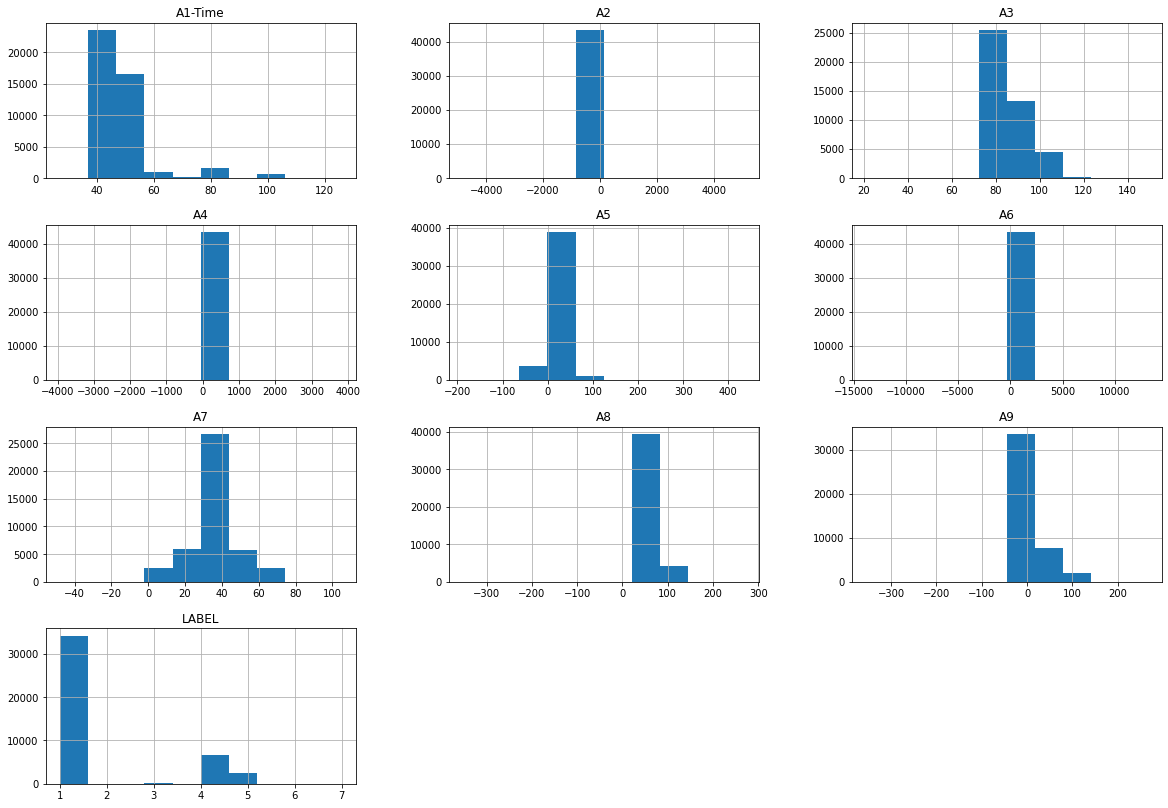

In [84]:
# Visualizing data to have a better idea of the data
# Plotting frequency of different attribute values since there are only 9 (+ 1 for assigned labels)
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy import stats
import numpy as np

# Visualize all numerical categories
dataset2_trn_full.hist(figsize=(20, 14))

'''
#removing outliers
subset=dataset2_trn.loc[:,'A2':'A9']
print(subset)
z_scores = stats.zscore(subset)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
print(filtered_entries)
dataset2_trn = dataset2_trn[filtered_entries]'''

print(dataset2_trn_full.describe())



            A1-Time            A2            A3            A4            A5  \
count  4.350000e+04  4.350000e+04  4.350000e+04  4.350000e+04  4.350000e+04   
mean   1.082965e-16  3.430206e-18  1.909482e-16  4.083579e-20 -1.454571e-16   
std    1.000011e+00  1.000011e+00  1.000011e+00  1.000011e+00  1.000011e+00   
min   -1.734323e+00 -6.169285e+01 -7.222492e+00 -9.607100e+01 -1.025329e+01   
25%   -8.365449e-01  2.625052e-03 -7.118554e-01 -6.407614e-03 -3.929742e-01   
50%   -2.652319e-01  2.625052e-03 -2.628460e-01 -6.407614e-03  3.442457e-01   
75%    5.509297e-01  2.625052e-03  4.106681e-01 -6.407614e-03  5.285506e-01   
max    6.345676e+00  6.494860e+01  7.145809e+00  9.339989e+01  1.849828e+01   

                 A6            A7            A8            A9         LABEL  
count  4.350000e+04  4.350000e+04  4.350000e+04  4.350000e+04  4.350000e+04  
mean   8.167158e-20 -1.908665e-16 -5.014635e-17 -6.394885e-17 -5.471996e-17  
std    1.000011e+00  1.000011e+00  1.000011e+00  1.000

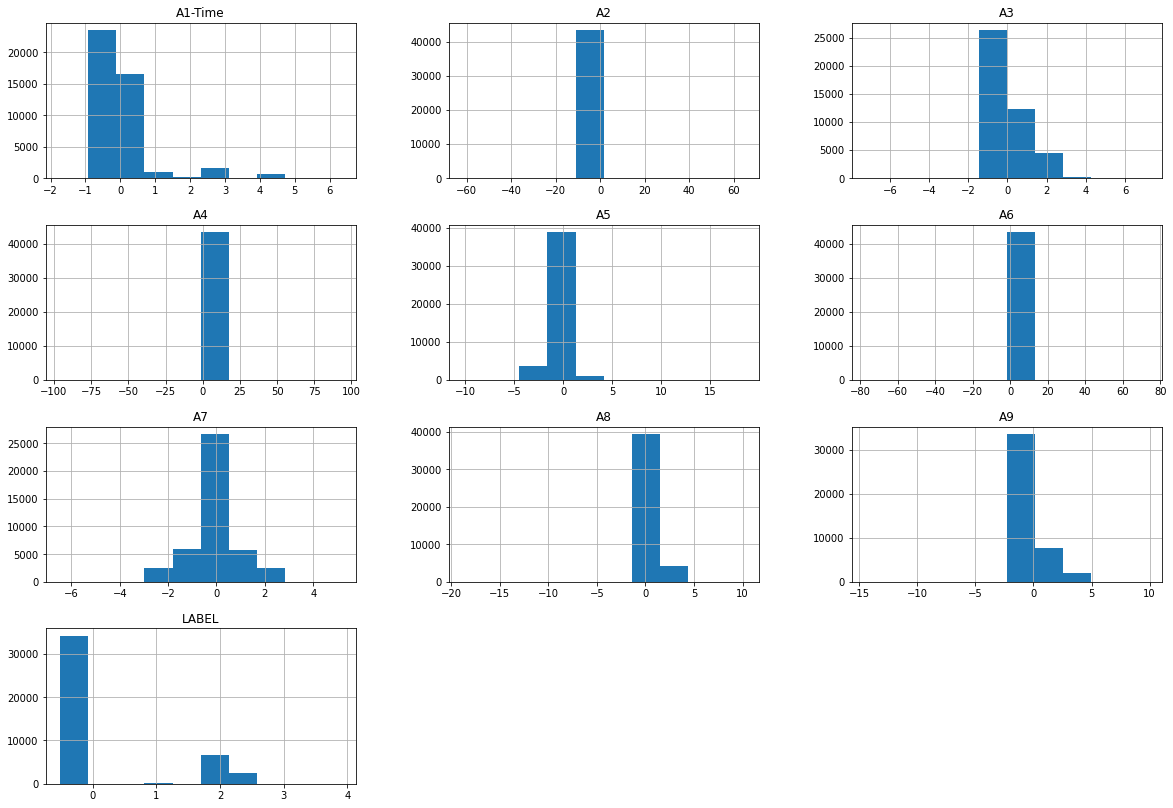

In [85]:
# Normalizing data since scales of some attributes are drastically different
from sklearn import preprocessing

x_train = dataset2_trn_full.values
'''min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x_train)
normalized_dataset_2 = pd.DataFrame(x_scaled, columns=names2)

normalized_dataset_2.hist(figsize=(20, 14))'''

scaler = preprocessing.StandardScaler()

# fit the scaler 
scaler.fit(x_train)

# transform the data
x_train_normal = scaler.transform(x_train)

normalized_dataset2 = pd.DataFrame(x_train_normal, columns=names2)

normalized_dataset2.hist(figsize=(20, 14))

print(normalized_dataset2.describe())




## One-hot coding
# No need for one-hot coding since all attributes and labels are numerical values